In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.figure_factory as ff


# Task 1. Data Cleaning and Preparation:

In [76]:
# Load the dataset
df = pd.read_csv('./Cardiotocographic.csv')

In [77]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [78]:
df.shape

(2126, 14)

# Handle missing values appropriately (e.g., imputation, deletion).

In [79]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

sincee the number of missing values is high, thats why I have chose to do imoutation insted of deletion

**Different approach for imputation during EDA**
* Mean Imputation: Data is symmetrically distributed and free from outliers.
* Median Imputation: Data is skewed or contains outliers.
* Mode Imputation: Data is categorical or when you want to use the most frequent value.

In [80]:
#to checkoutlier we can use boxplot 
fig_box = px.box(df)
fig_box.show()
#we cna see that there are large number of outlier present in the dataset so we can use median to replace the missing value or null values 

In [81]:
df.fillna(df.median(), inplace=True)
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [82]:
#Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
df.dtypes
#we can see that all columns are of type float64, indicating that they are numerical. There are no inconsistencies in data types

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

# Detect and treat outliers if necessary.

in above box plot graph we can see that there are outliers present in our dataset so now we have to handle them using
appropriate method. since we have medica data outlier may contain value inforamtion so we can not delete them so we have to 
threat them. I have choose winsorization method in which we can cap data using upper and lower qurtile range 

In [83]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Step 2: Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Cap the outliers in each column by applying the limits. we can set the upper and lower bound limit 
df_capped = df.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name],
                                        np.where(x > upper_bound[x.name], upper_bound[x.name], x)))


In [84]:
# convert the clean data into dataframe for next processing or model budlding step 
df_capped = pd.DataFrame(df_capped, columns=df.columns)
df_capped.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


# Task 2. Statistical Summary:


Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [85]:
# describe method is used to get the statistical values from the dataset 
summary = df_capped.describe().T
summary['median'] = df_capped.median()
summary['IQR'] = df_capped.quantile(0.75) - df_capped.quantile(0.25)
print(summary)

           count        mean        std         min         25%         50%  \
LB        2126.0  133.290331   9.930268  105.000000  126.000000  133.000000   
AC        2126.0    0.003132   0.003828   -0.008409    0.000000    0.001634   
FM        2126.0    0.001568   0.002485   -0.003850    0.000000    0.000000   
UC        2126.0    0.004362   0.003001   -0.005177    0.001851    0.004484   
DL        2126.0    0.001770   0.002668   -0.004934    0.000000    0.000000   
DS        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
DP        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
ASTV      2126.0   46.981873  17.612745  -11.500000   32.000000   49.000000   
MSTV      2126.0    1.304644   0.781091   -0.800000    0.700000    1.200000   
ALTV      2126.0    6.691678  10.378400  -16.500000    0.000000    0.000000   
MLTV      2126.0    8.007471   5.047078   -4.700000    4.600000    7.400000   
Width     2126.0   70.287203  39.571995  -57.500000 

# Task 3. Data Visualization:

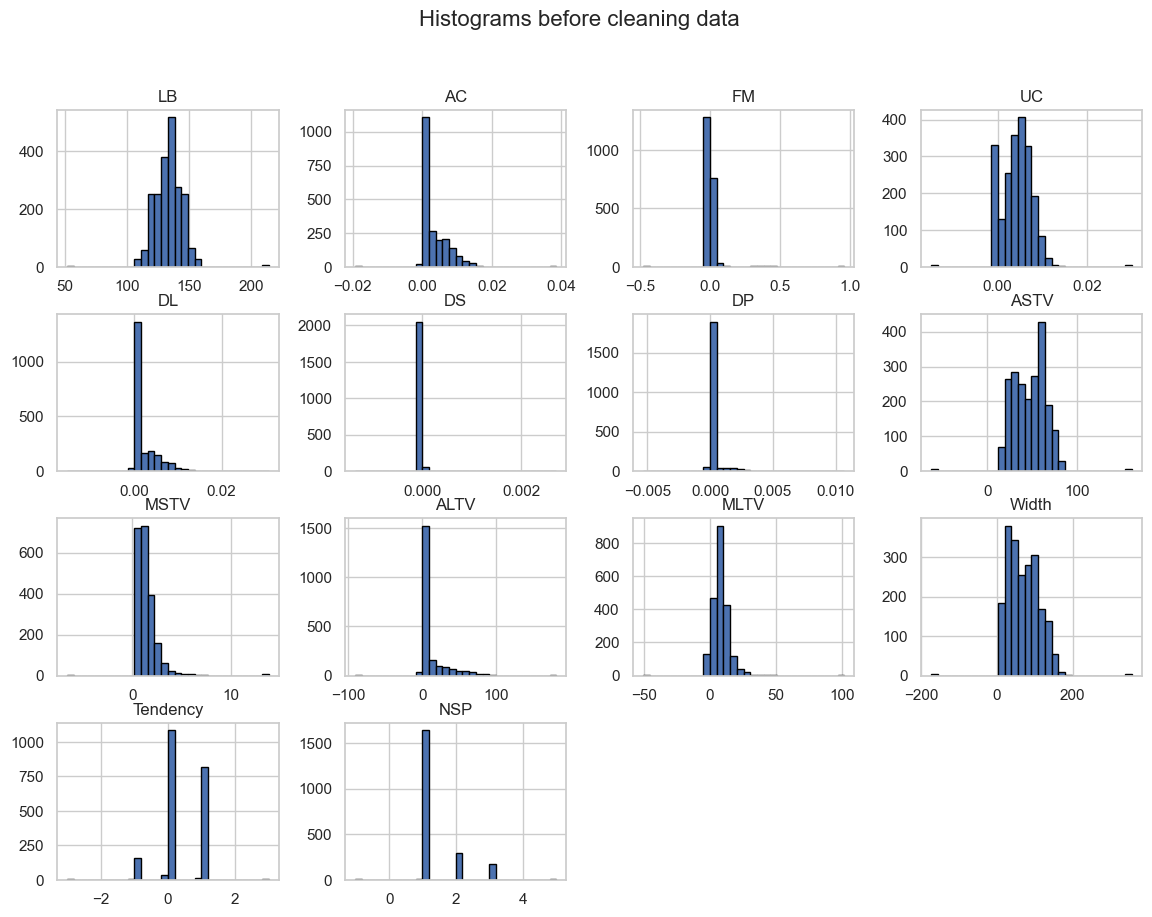

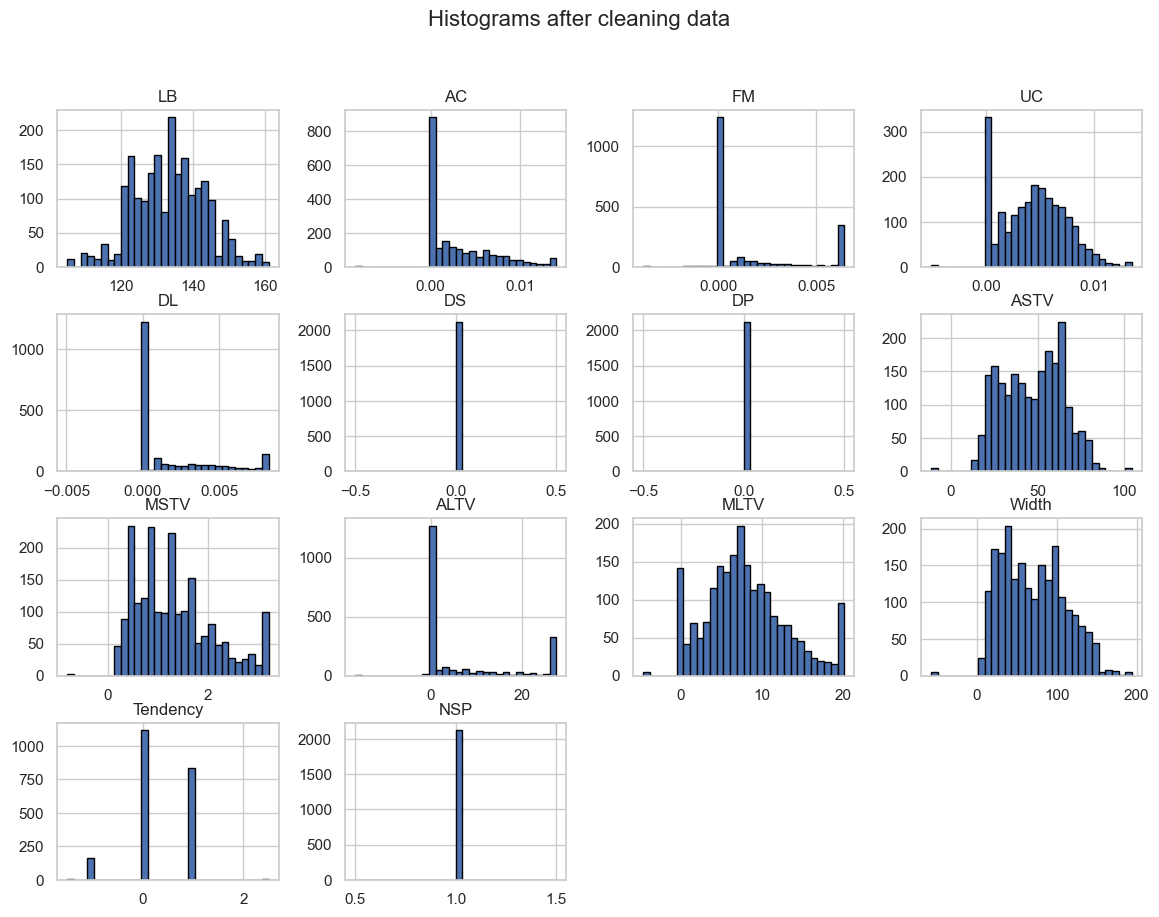

In [86]:
#Create histograms or boxplots to visualize the distributions of various numerical variables.
# Plot histograms for all columns

#Before clanning the dataset. original dataset 
sns.set(style="whitegrid")

# Plot histograms for numerical variables
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms before cleaning data ', fontsize=16)
plt.show()

# After clannig the data. clean dataset
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot histograms for numerical variables
df_capped.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms after cleaning data ', fontsize=16)
plt.show()

#we can clearly see that data get more distrubated and less skewed after doing some cleaning process 

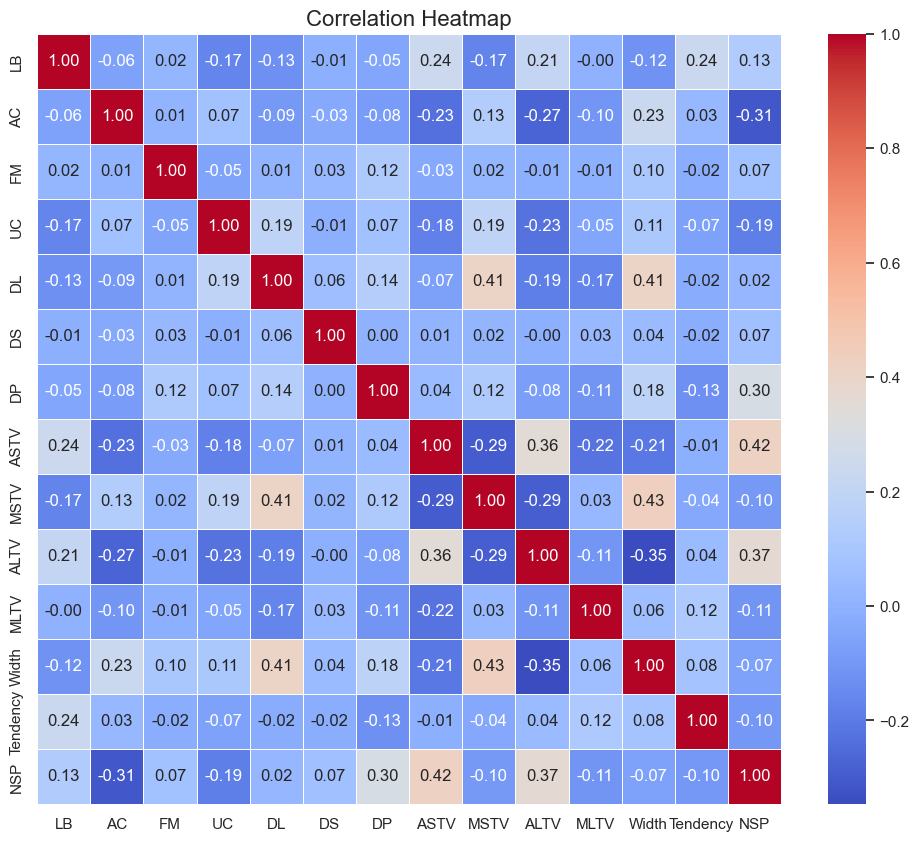

In [87]:
#Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**By Analysing above heatmap we can couclude that**

*MSTV is positively correlated with DL (0.41) and Width(0.43), showing a connection between variability and decelerations.*

*AC has a negative correlation with NSP (-0.31) and ASTV (-0.23), indicating that fewer accelerations might be linked to fetal outcomes and abnormal variability.*

*ASTV is positively correlated with NSP (0.42), suggesting prolonged decelerations could influence the target outcome.*







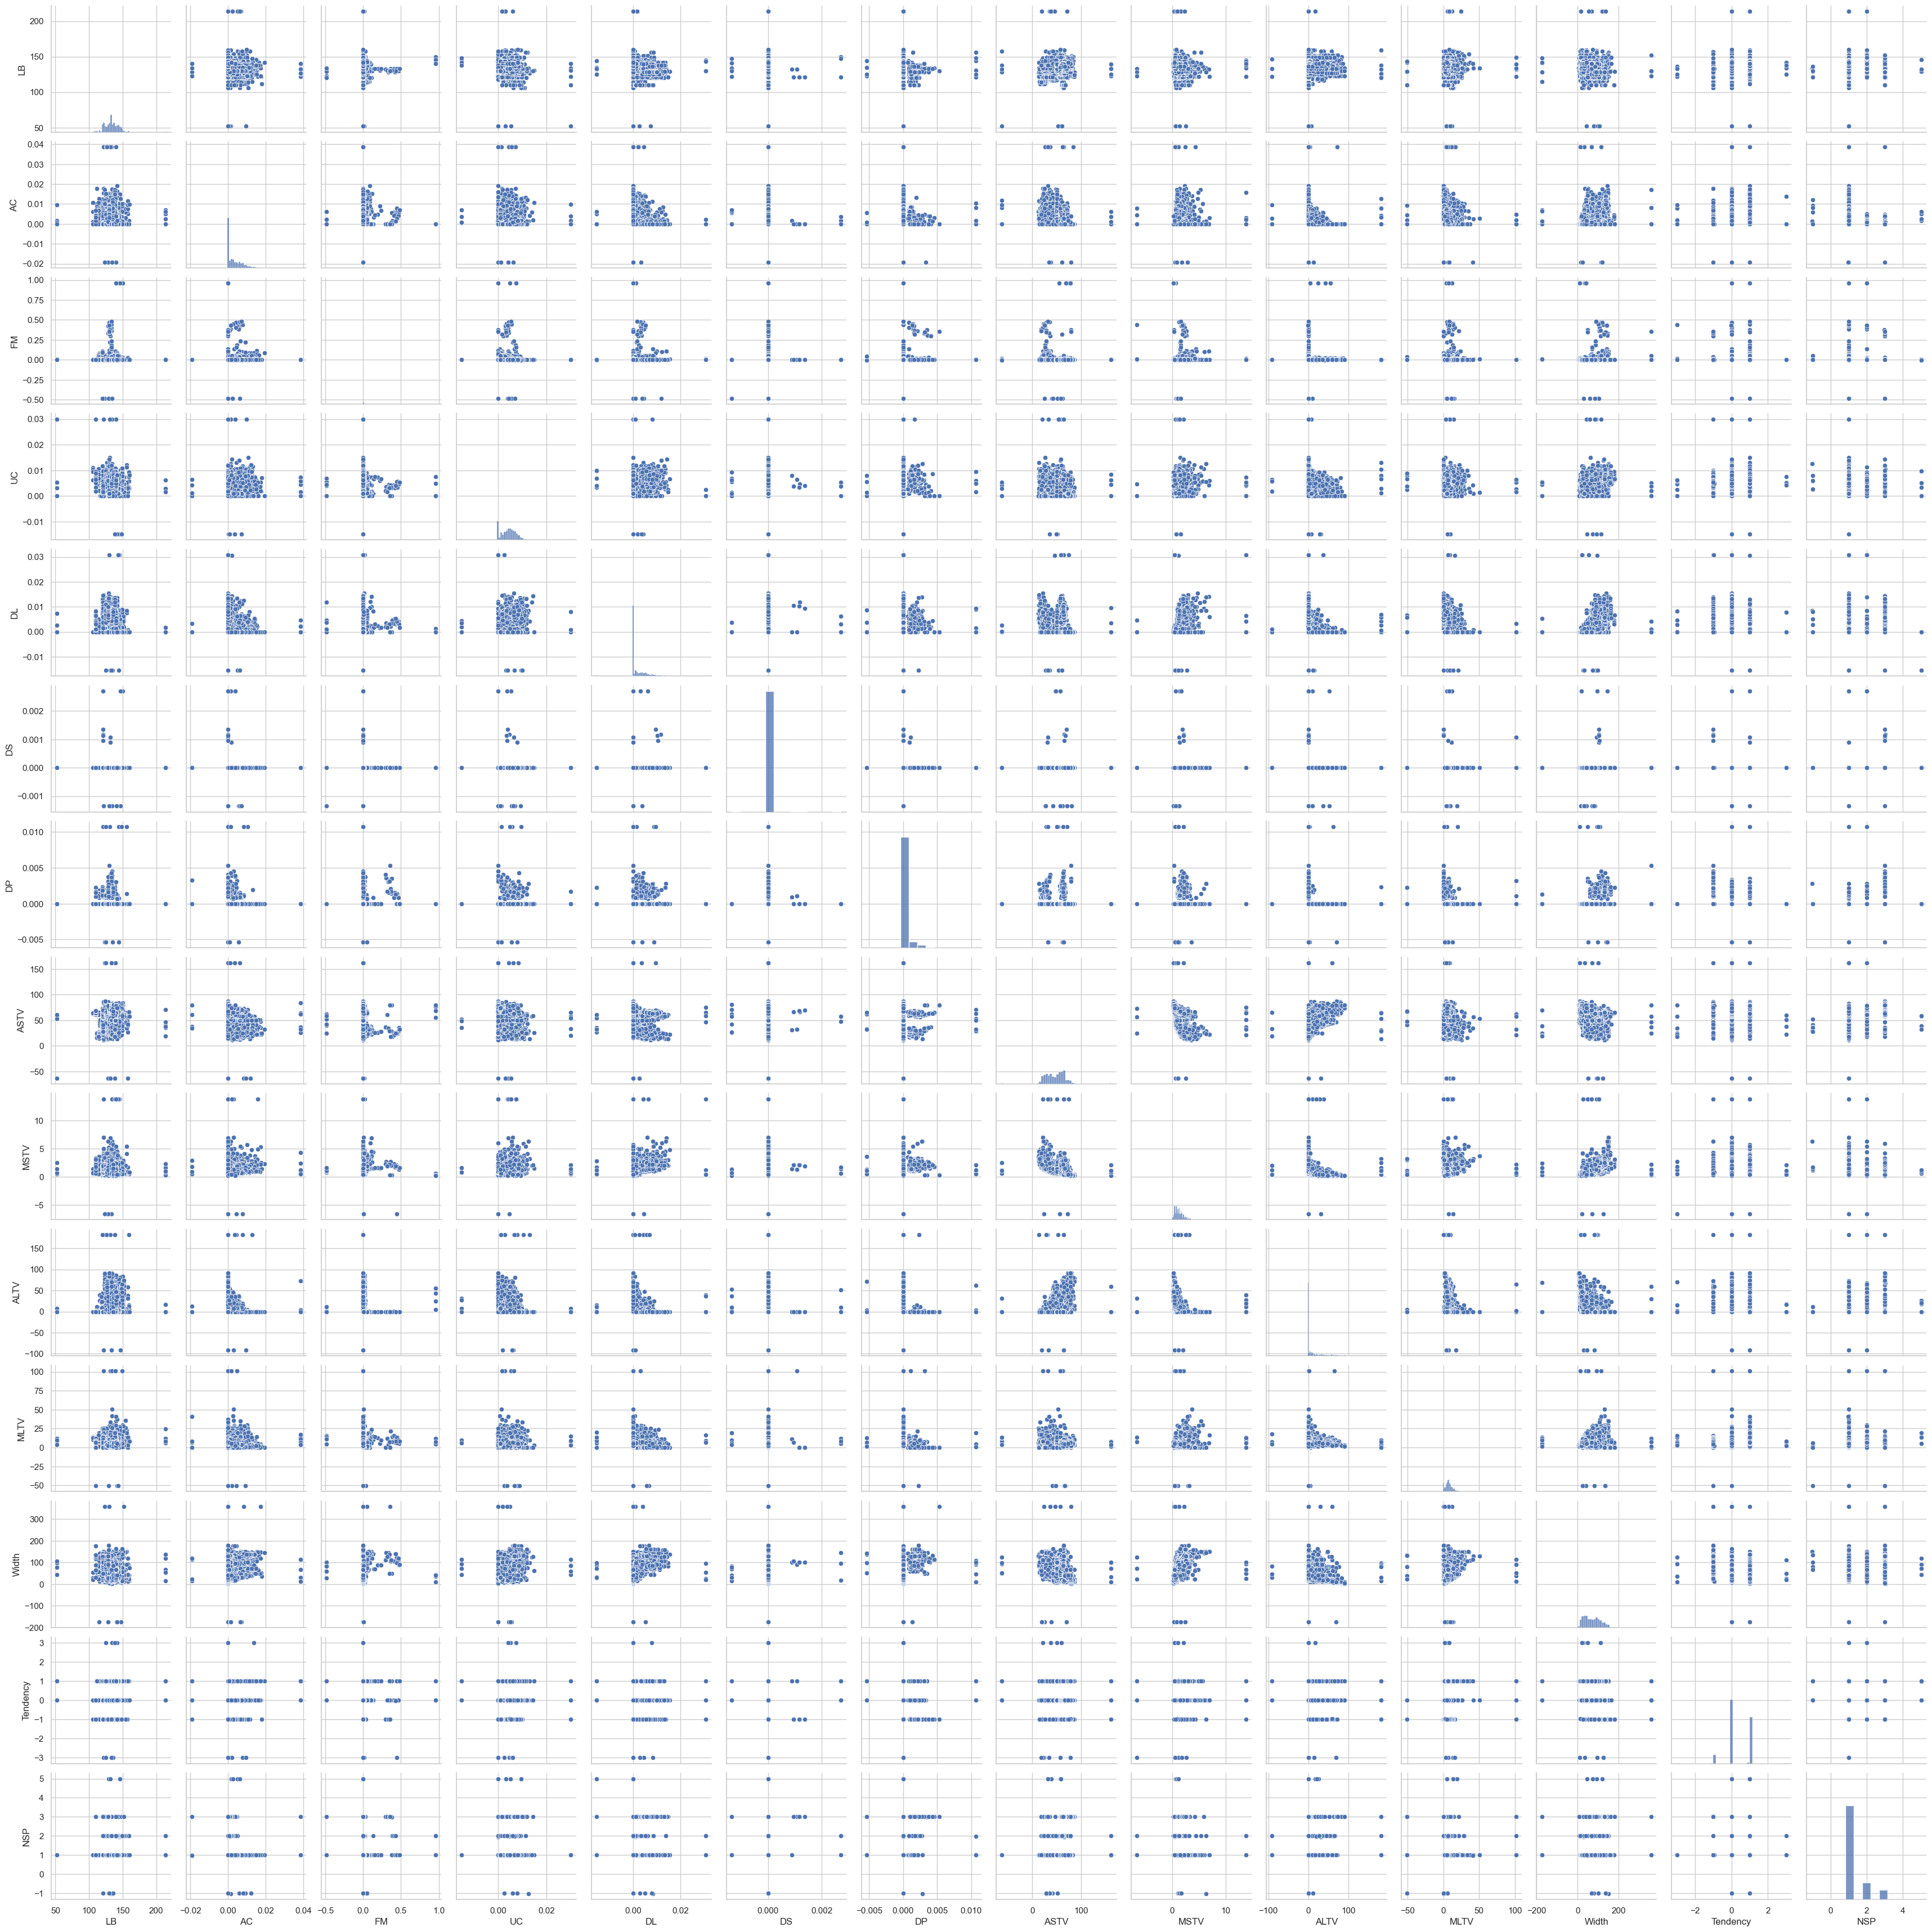

In [89]:
#Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
# Pair plots for deeper insights
pairplot = sns.pairplot(df)
plt.show()

* The pair plot shows a clear positive relationship between ASTV and NSP, confirming that higher abnormal short-term variability is associated with adverse outcomes.*
* Positive trend, indicating that increased late decelerations (DL) correlate with higher MSTV.*

# Task 4. Pattern Recognition and Insights:

* Pair Plot: Shows a clear positive relationship between ASTV and NSP.
* Heatmap: Confirms this with a strong positive correlation 0.42.
* Relation: Both visuals emphasize that higher ASTV is a key indicator of fetal distress.


* Pair Plot: Displays a visible trend where increased MSTV is associated with higher DL.
* Heatmap: Supports this with a moderate positive correlation 0.41.
* Relation: Both highlight that DL affects MSTV, which is important for assessing fetal health.


# Task 5. Conclusion:

* **Data Quality:** Data had some missing values and outliers but it was easy to handle and specially outliers are senstive sence this is madical data so handling them was a tough job.
* **Statistical Summary:** The statistical summary reveals that the variables are symmetrically distributed with no extreme outliers. Measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range) are consistent, indicating a stable dataset.
* **Moderate Correlations:** The correlation heatmap and pair plots show moderate correlations between certain variables, such as ASTV and NSP, suggesting potential interdependencies.
* **Data -Distributed:** while data had some skewness but and outlier buit after handled them it become well distributed and less skewed.
